# TP1 SDTSIA204 : Linear Regression
## Aurore GOSMANT

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy.linalg as lng
from mpl_toolkits import mplot3d

In [6]:
invest =pd.read_csv("invest.txt", sep=" ")
invest

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


### Question 2

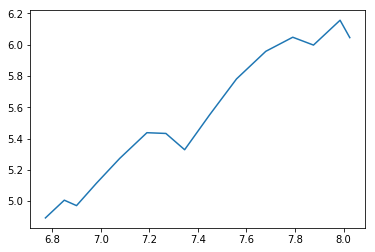

In [7]:
x= np.log(invest['gnp'])
##x=invest['gnp']
y= np.log(invest['invest'])
##plt.xlabel("Gross National Product")
##plt.ylabel("Investment")
##plt.title("invest = f(gnp)")
plt.plot(x,y)

### Question 3

Start by working out the mean of GNP and Invest. Then, work out estimantor of B1, then Bô to evaluate the slope and the y-intercept

### Estimator of y-intercept and slope

In [8]:
meanX = np.mean(invest['gnp'])
print(meanX)

meanInvest = np.mean(invest['invest'])
print(meanInvest)

sumNumerator = 0
sumDenominator = 0
n = len(invest['gnp'])

for i in range(n):
    diffX = invest['gnp'][i] - meanX
    diffY = invest['invest'][i] - meanInvest
    
    sumNumerator += diffX*diffY
    sumDenominator += diffX**2
    
B1 = sumNumerator/sumDenominator
B0 = meanInvest - B1*meanX
print(B1)
print(B0)
    

1748.6466666666668
276.0066666666666
0.15496368358808524
5.02993790597327


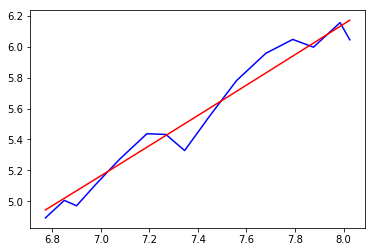

In [9]:
logGNP = np.log(invest['gnp'])
plt.plot(logGNP, np.log(invest['invest']), color="blue") #Empricial investment
plt.plot(logGNP, np.log(B0+B1*invest['gnp']), color="red") #Investment estimator

plt.show()

### Estimation of standard deviation

In [10]:
s = 0
for k in range(n):
    s+= (invest['invest'][k]-(B0+B1*invest['gnp'][k]))**2
sigma_square = s/(n-2)
print("sigma", sigma_square)

var_B0 =sigma_square*(1/n + meanX**2/sumDenominator)
var_B1 = sigma_square/sumDenominator

print("variance de Beta0 = ",var_B0)
print("variance de Beta1 = ", var_B1)

sigma 798.6240698049653
variance de Beta0 =  373.37735291466424
variance de Beta1 =  0.00010469598906470827


### Coefficient for the Ordinary Least Squares (OLS)

In [11]:
s1 = 0
s2 = 0
for k in range(n):
    s1 += (B0+B1*invest['gnp'][k]-invest['invest'][k])**2
    s2 += (invest['invest'][k]-meanInvest)**2
R_square = 1 - s1/s2
print("R² = ", R_square)

R² =  0.9463622043994031


### Results

In [12]:
results = {'Beta':[B0, B1], 'Standard Deviation':[var_B0, var_B1], 'OLS Coefficient R²':[R_square, R_square] }
data_frame = pd.DataFrame(data = results)
data_frame

,Beta,Standard Deviation,OLS Coefficient R²
0,5.029938,373.377353,0.946362
1,0.154964,0.000105,0.946362


### Question 4 : Student test with $\alpha = 0.05$

In [13]:
alpha = 0.05
quantile = stats.t.ppf(1-alpha/2, df = n-2)
print("Interval of acceptance :",[-quantile, quantile])

H0 = B1/(var_B1)**0.5
print(H0)

if (H0>-quantile and H0< quantile):
    print("The hypothesis H0 at the level 1-", alpha,"/2 isn't rejected : The slope B1 verifies H0")
else : 
    print("The hypothesis H0 at the level 1-", alpha,"/2 is rejected")

Interval of acceptance : [-2.1603686564610127, 2.1603686564610127]
15.14484766332018
The hypothesis H0 at the level 1- 0.05 /2 is rejected


### P-value

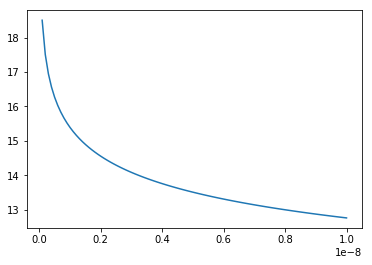

In [14]:
x = np.linspace(0,0.00000001,100)
y = [stats.t.ppf(1-k/2, df = n-2) for k in x]

plt.plot(x,y)

#plt.xlabel("Alpha")
#plt.ylabel("quantile")

plt.show()

In [15]:
p_value = stats.t.sf(H0, df = n-2) # Repartition function
print(p_value)

6.130546315062383e-10


### Question 5 : Confidence interval at 90%. 

In [16]:
gnp = 1000
investment = B0 + B1*gnp

quantile90 = stats.t.ppf(0.90, df = n-2)

factor = np.sqrt(sigma_square*(1/n+(1000-meanX)**2/sumDenominator))
CI_inf = investment-quantile90*factor
CI_sup =investment+quantile90*factor
print("Confidence Interval at 90% :",[CI_inf, CI_sup])


Confidence Interval at 90% : [145.70980741244554, 174.2774355756715]


### Prediction Interval at 90%

In [17]:
factor1 = np.sqrt(sigma_square*(1+1/n+(1000-meanX)**2/sumDenominator))
PI_inf = investment-quantile90*factor1
PI_sup =investment+quantile90*factor1
print("Prediction Interval at 90% :",[PI_inf, PI_sup])

Prediction Interval at 90% : [119.25188511974255, 200.73535786837448]


In [18]:
if(investment>CI_inf and investment<CI_sup):
    print("Investement is in the Confidence Interval at 90%")
else : 
    print("Investement is in the Confidence Interval at 90%")
    

if(investment>PI_inf and investment<PI_sup):
    print("Investement is in the Prediction Interval at 90%")
else : 
    print("Investement is in the Prediction Interval at 90%")

Investement is in the Confidence Interval at 90%
Investement is in the Prediction Interval at 90%


### Question 6

In [19]:
def Investment(gnp):
    return B0 + B1*gnp

def CI_inf(x):
    investment = Investment(x)
    tmp = np.sqrt(sigma_square*(1/n+(x-meanX)**2/sumDenominator))
    return(investment-quantile90*tmp)

def CI_sup(x):
    investment = Investment(x)
    tmp = np.sqrt(sigma_square*(1/n+(x-meanX)**2/sumDenominator))
    return(investment+quantile90*tmp)

def PI_inf(x):
    investment = Investment(x)
    tmp = np.sqrt(sigma_square*(1+1/n+(x-meanX)**2/sumDenominator))
    return(investment-quantile90*tmp)
    
def PI_sup(x):
    investment = Investment(x)##x=invest['gnp']
    tmp = np.sqrt(sigma_square*(1+1/n+(x-meanX)**2/sumDenominator))
    return(investment+quantile90*tmp)

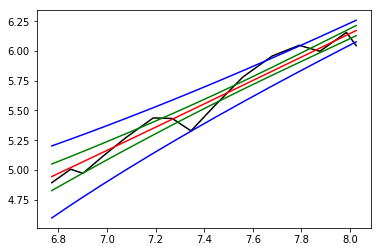

In [20]:
logGNP = np.log(invest['gnp'])
plt.plot(logGNP, np.log(invest['invest']), color="black") #Empricial investment
plt.plot(logGNP, np.log(B0+B1*invest['gnp']), color="red") #Investment estimator

plt.plot(logGNP, np.log(CI_inf(invest['gnp'])), color="green")
plt.plot(logGNP, np.log(CI_sup(invest['gnp'])), color="green")

plt.plot(logGNP, np.log(PI_inf(invest['gnp'])), color="blue")
plt.plot(logGNP, np.log(PI_sup(invest['gnp'])), color="blue")
         
plt.xlabel = ("Group National Product")
plt.ylabel = ("Investment")

plt.show()

### Question 7

### Linear Regression Parameters using Python sklearn model

In [21]:
x = np.asarray(invest['gnp'])
x = x.reshape(-1,1)

y = np.asarray(invest['invest'])
print(np.shape(y), np.shape(x))

reg = LinearRegression().fit(x,y)

beta_0 = reg.intercept_
beta_1 = reg.coef_[0]

score = reg.score(x,y)

parameters = {'Parameters Beta Sklearn Linear Regression':[beta_0, beta_1], 
              'Theorical parameters':[B0, B1],
              'R²': [score, score],
              'Theroetical R²':[R_square, R_square]
             }
data_frame = pd.DataFrame(data = parameters)
data_frame


(15,) (15, 1)


,Parameters Beta Sklearn Linear Regression,Theorical parameters,R²,Theroetical R²
0,5.029938,5.029938,0.946362,0.946362
1,0.154964,0.154964,0.946362,0.946362


### Prediction of the necessary investment

In [22]:
def Investment_sklearn(gnp):
    return ((beta_0 + beta_1*gnp))

print("Necessary Investment for GNP = 1000 :", Investment_sklearn(1000))

Necessary Investment for GNP = 1000 : 159.99362149405854


### Question 8

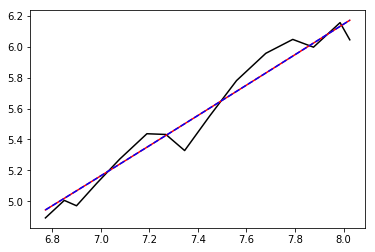

In [23]:
logGNP = np.log(invest['gnp'])
plt.plot(logGNP, np.log(invest['invest']), color="black") #Empricial investment data
plt.plot(logGNP, np.log(Investment_sklearn(invest['gnp'])), color="red")#Investment estimator using pyhton sklearn
plt.plot(logGNP, np.log(B0+B1*invest['gnp']),'--', color='blue') #Investment estimator

plt.show()

The two linear regression coincide perfectly. We can deduce that the two manners of modeling our data base by a linear regression are correct.

##  PART II

### Question 9 : Gram Matrix

In [102]:
n = len(invest['gnp'])

X1 =  np.log(invest['gnp'])
X2 = invest['interest']
Y = np.log(invest['invest'])
X=np.array([[1,X1[i],X2[i]] for i in range(n)])

Gram_GNP=1/n*X.T @ X


##Work out the determinant in order to determine if the matrix is invertibl

print("The determinant of G is : ")
print(np.linalg.det(Gram_GNP))

The determinant of G is : 
0.38702748682374194


Thus, according to the value of the determinant of the Gram Matrix of the GNP is not null, even though it is nearly null, we can deduce that the matrix is inversible, thus, it's is full rank.

### Question 10
#### For the linear regression of Investement on GNP, the  Gram Matrix in invertible, so : $\theta\ = 1/n*$

In [25]:
Y = np.log(invest['invest'])

#N = np.linalg.matrix_rank(Gram_Matrix_GNP)

#XtX = #n*Gram_Matrix_GNP

theta_n = np.linalg.inv(X.T @ X) @ X.T @ Y

print(theta_n)

[-2.18045473  1.05124269 -0.00652888]


### Determination Coefficient for the OLS

In [26]:
Y_estimate = theta_n[0] + theta_n[1]*X1 + theta_n[2]*X2

meanY = np.mean(Y)

sum0 = 0
sum1 = 0

for i in range(n):
    sum0 += (Y_estimate[i] - Y[i])**2
    sum1 += (Y[i] - meanY)**2
             
R2 = 1 - sum0/sum1
             
print(R2)

0.9633108306726244


In [27]:
p = len(theta_n)-1

sum = 0
for i in range(n):
    sum += (Y[i] - Y_estimate[i])**2

var = 1/(n-(p+1))*sum

print(var)

0.008192432955519805


### Determination Coefficients and P-values

In [28]:
C = var * np.linalg.inv(X.T @ X)
print(C)

p_value0 = stats.t.sf(theta_n[0]/(C[0][0]**0.5), df = n-3)
p_value1 = stats.t.sf(theta_n[1]/(C[1][1]**0.5), df = n-3)
p_value2 = stats.t.sf(theta_n[2]/(C[2][2]**0.5), df = n-3)


results = {
    'Beta':[theta_n[0], theta_n[1], theta_n[2]], 
    'Standard Deviation':[C[0][0], C[1][1], C[2][2]], 
    'P-value':[p_value0, p_value1, p_value2] 
}

data_frame = pd.DataFrame(data = results)
data_frame

[[ 4.38772697e-01 -6.72457405e-02  7.82053357e-03]
 [-6.72457405e-02  1.04165249e-02 -1.29683702e-03]
 [ 7.82053357e-03 -1.29683702e-03  2.35444629e-04]]


,Beta,Standard Deviation,P-value
0,-2.180455,0.438773,9.967808e-01
1,1.051243,0.010417,1.299758e-07
2,-0.006529,0.000235,6.609964e-01


#### P-values

The p-value for beta1 is too small, thus the nul hypothesis, ie beta1 = 0, is rejected. Thus, the investment is dependant on the GNP and the interest.

### Question 11

### Confidence Interval

In [29]:
GNP = np.log(1000)
Interest = 10

investment_estimator = theta_n[0] + theta_n[1]*GNP + theta_n[2]*Interest
print("The estimator of the Investment for the given values is : ", investment_estimator)

quantile99 = stats.t.ppf(0.999, df = n-3)

x = np.array([1, np.log(1000), 10])

CI_inf_est = investment_estimator - quantile99*(x.T @ C @ x)**0.5
CI_sup_est =investment_estimator + quantile99*(x.T @ C @ x)**0.5

print("Confidence Interval at 99,9% :",[CI_inf_est, CI_sup_est])

The estimator of the Investment for the given values is :  5.015983730482089
Confidence Interval at 99,9% : [4.673967435442851, 5.358000025521328]


Therefore, the investment estimator belongs to the confidence interval at 99,9%.

### Prediction Interval

In [30]:
PI_inf_est = investment_estimator - quantile99*(var + x.T @ C @ x)**0.5
PI_sup_est =investment_estimator + quantile90*(var + x.T @ C @ x)**0.5

print("Prediction Interval at 99,9% :",[PI_inf_est, PI_sup_est])

Prediction Interval at 99,9% : [4.522543926744156, 5.185523280583476]


### Question 12 :  3D-plot

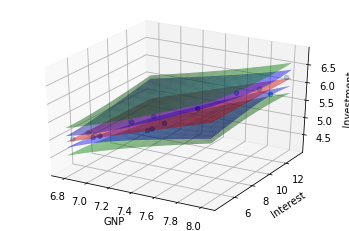

In [101]:
ax = plt.axes(projection='3d')

ax.scatter(X1, X2, Y)
ax.set_xlabel('GNP');
ax.set_ylabel('Interest');
ax.set_zlabel('Investment');


X1_3D = np.linspace(X1.min(),X1.max(),1000)
X2_3D = np.linspace(X2.min(),X2.max(),1000)
ax_X1,ax_X2 = np.meshgrid(X1_3D,X2_3D)

ax_Y = theta_n[0] + theta_n[1]*ax_X1 + theta_n[2]*ax_X2

listCinf = []
listCsup = []
listPinf = []
listPsup = []
for i in range(1000):
    listCinf.append([])
    listCsup.append([])
    listPinf.append([])
    listPsup.append([])
    
    for j in range(1000):
        x = np.array([1, ax_X1[i,j], ax_X2[i,j]])
      
        tmp = quantile99*(x.T @ C @ x)**0.5
        tmp1 = quantile99*(var + x.T @ C @ x)**0.5

        investment_estimator = theta_n[0] + theta_n[1]*ax_X1[i,j] + theta_n[2]*ax_X2[i, j]
        listCinf[i].append(investment_estimator - tmp)
        listCsup[i].append(investment_estimator + tmp)
        listPinf[i].append(investment_estimator - tmp1)
        listPsup[i].append(investment_estimator + tmp1)
        
        
plane = ax.plot_surface(ax_X1, ax_X2, ax_Y, alpha = 0.5, color="red")

ax.plot_surface(ax_X1, ax_X2, np.array(listCinf),alpha = 0.5, color = "blue")
ax.plot_surface(ax_X1, ax_X2, np.array(listCsup),alpha = 0.5, color = "blue")

ax.plot_surface(ax_X1, ax_X2, np.array(listPinf),alpha = 0.5, color = "green")
ax.plot_surface(ax_X1, ax_X2, np.array(listPsup),alpha = 0.5, color = "green")



plt.show()


### Question 13

In [116]:
X = np.array([[X1[i], X2[i]] for i in range(len(X1))])
linearReg = LinearRegression().fit(X,Y)



res = {
    'Slopes':linearReg.coef_, 
    'Intercept':linearReg.intercept_, 
    'Determination Coefficient':linearReg.score(X,Y), 
    'Investment estimator for GNP = 1000 and interest = 10': np.exp(linearReg.predict([[np.log(1000), 10]]))[0]
}

data_frame = pd.DataFrame(data = res)
data_frame


,Slopes,Intercept,Determination Coefficient,Investment estimator for GNP = 1000 and interest = 10
0,1.051243,-2.180455,0.963311,150.804415
1,-0.006529,-2.180455,0.963311,150.804415
